## Lab01 Report

##### Pranisaa Charnparttaravanit st121720

## AlexNet on CIFAR-10

### Introduction
In this lab, AlexNet model was implemented on the CIFAR-10 data set. Since AlexNet is a 1000-class classifier, it is necessary to alter the last layer of the model so that it is applicable to a 10-class classification problem. 

As for the architechture of the model employed in this lab, not only the last layer of AlexNet was altered, but also the first and the fourth layers of the classifer were altered and they are as follows:

- model.classifier[1] = nn.Linear(9216,4096)
- model.classifier[4] = nn.Linear(4096,1024)
- model.classifier[6] = nn.Linear(1024,10)

Apart from the alteration of the model architechture, there are some parameters which play an important role in the model performance such as parameters for the loss and optimizer functions as well as the type of these functions themselves. The followings are the parameters that are used in this lab:

- loss function (refered to as criterion in this lab): cross entropy loss
- optimizer = stocastic gradient descent with the learning rate of 0.01

The model was trained for 15 EPOCH with a batch size of 64. As a result, the model achieved the test accuracy of 88.18%.

#### Import libraries

In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import TensorDataset

import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

### 1. Download pretrained model AlexNet

In [2]:
model = torch.hub.load('pytorch/vision:v0.5.0', 'alexnet', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.5.0', 'alexnet', pretrained=False)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


In [3]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 1.1 Modify the output of AlexNet to predict 10 classes

In [4]:
model.classifier[1] = nn.Linear(9216,4096)
model.classifier[4] = nn.Linear(4096,1024)
model.classifier[6] = nn.Linear(1024,10)

In [5]:
# after changing the output layer, let's see the modified architecture
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
model.eval()
# 64 and not 96 like whats written in the paper due to 1GPU training instead of 2

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 2. Download the Data

In [7]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [8]:
train_val_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
print(type(train_val_data))
print(len(train_val_data))

torchvision.datasets.cifar.CIFAR10
50000


#### 2.1 Train Validation Test Data Split

In [10]:
#Train test split
train_size = int(len(train_val_data) * 0.7)
valid_size = int(len(train_val_data) * 0.3)

train_set, valid_set = torch.utils.data.random_split(train_val_data, [train_size, valid_size])

In [11]:
BATCH_SIZE = 64 #keeping it binary so it fits GPU

#Train set loader
train_iterator = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True, pin_memory = True)
#Validation set loader
valid_iterator = torch.utils.data.DataLoader(dataset=valid_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True, pin_memory = True)

#Test set loader
test_iterator = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True, pin_memory = True)

### 3. Define Train and Evaluate Functions

In [12]:
def train(model, iterator, optimizer, criterion):
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    predicteds = []
    trues = []    
    
    model.train()
    
    for batch, labels in iterator:

        #Move tensors to the configured device
        batch = batch.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(batch.float())
        loss = criterion(outputs, labels.long())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        #check accuracy
        predictions = model(batch.float()) #<<< already updated
        predictions = nn.functional.softmax(predictions, dim=1)
        _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
        predicteds.append(predicted)
        trues.append(labels)        
        total += labels.size(0)  #keep track of total
        correct += (predicted == labels).sum().item()  #.item() give the raw number
        acc = 100 * (correct / total)
                
        epoch_loss += loss.item()
        epoch_acc = acc
        
    return epoch_loss / len(iterator), epoch_acc,predicteds, trues

In [13]:
def evaluate(model, iterator, criterion):
    
    total = 0
    correct = 0
    epoch_loss = 0
    epoch_acc = 0
    
    predicteds = []
    trues = []
    
    model.eval()
    
    with torch.no_grad():
    
        for batch, labels in iterator:
            
            #Move tensors to the configured device
            batch = batch.to(device)
            labels = labels.to(device)

            predictions = model(batch.float())   
            loss = criterion(predictions, labels.long())
            
            predictions = nn.functional.softmax(predictions, dim=1)            
            _, predicted = torch.max(predictions.data, 1)  #returns max value, indices
            
            clear_output(wait=True)
#             print('================== Predicted y ====================')
#             print(predicted) 
#             print('==================    True y   ====================')
#             print(labels)            
            predicteds.append(predicted)
            trues.append(labels)            
            total += labels.size(0)  #keep track of total
            correct += (predicted == labels).sum().item()  #.item() give the raw number
            acc = 100 * (correct / total)
            
            epoch_loss += loss.item()
            epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator),predicteds, trues

#### 3.1 Count the parameters

In [14]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# for model in models:
print(f'The model {type(model).__name__} has {count_parameters(model):,} trainable parameters')# Train the model

The model AlexNet has 44,428,106 trainable parameters


#### 3.2 Define Loss and Optimizer Functions

In [15]:
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

##### Let's check availability of cuda...

In [16]:
from chosen_gpu import get_freer_gpu
device = torch.device(get_freer_gpu()) if torch.cuda.is_available() else torch.device("cpu")
print("Configured device: ", device)

Configured device:  cuda:0


##### Put everything to the according device...

In [17]:
model = model.to(device)
# model.load_state_dict(torch.load('checkpointss/alexnet-cifar-10-%02d-epochs-sgd-0.01.pth' % epoch))
criterion = criterion.to(device)

In [18]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### 4. Training

In [19]:
N_EPOCHS = 15

best_valid_loss = float('inf')

train_losses = []
valid_losses = []

train_accs = []
valid_accs = []

# train_predicted_labels = []
# valid_predicted_labels = []

# train_true_labels = []
# valid_true_labels = []

for epoch in range(N_EPOCHS):
    print(f'training {epoch}')
    start_time = time.time()

    train_loss, train_acc, _, _ = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc, _, _ = evaluate(model, valid_iterator, criterion)
    train_losses.append(train_loss); train_accs.append(train_acc);  
    valid_losses.append(valid_loss); valid_accs.append(valid_acc);

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)  
    
    if (epoch+1) % 5 == 0:
        clear_output(wait=True)            
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Model:{} saved.".format(type(model).__name__))
#         torch.save(model.state_dict(), f'../notebooks_beau/{type(model).__name__}{i}.pth.tar')
        torch.save(model.state_dict(), ('checkpoints_lab01/alexnet-cifar-10-%02d-epochs-sgd-0.01.pth' % epoch))

Epoch: 15 | Epoch Time: 2m 1s
	Train Loss: 0.172 | Train Acc: 97.63%
	 Val. Loss: 0.343 |  Val. Acc: 89.22%


### Results

The model at the epoch 10 performed the best with the accuracy of 88.18%.

In [21]:
model.load_state_dict(torch.load('checkpoints/alexnet-cifar-10-%02d-epochs-sgd-0.01.pth' % 10))

test_loss, test_acc, test_pred_label, test_true_label  = evaluate(model, test_iterator, criterion)

In [22]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%')

Test Loss: 0.333 | Test Acc: 88.18%


In [23]:
print(test_pred_label[-1])
print(test_true_label[-1])

tensor([9, 8, 5, 8, 1, 1, 6, 9, 9, 8, 6, 2, 3, 5, 6, 7], device='cuda:0')
tensor([9, 8, 5, 8, 1, 1, 6, 9, 9, 8, 6, 2, 3, 5, 6, 7], device='cuda:0')


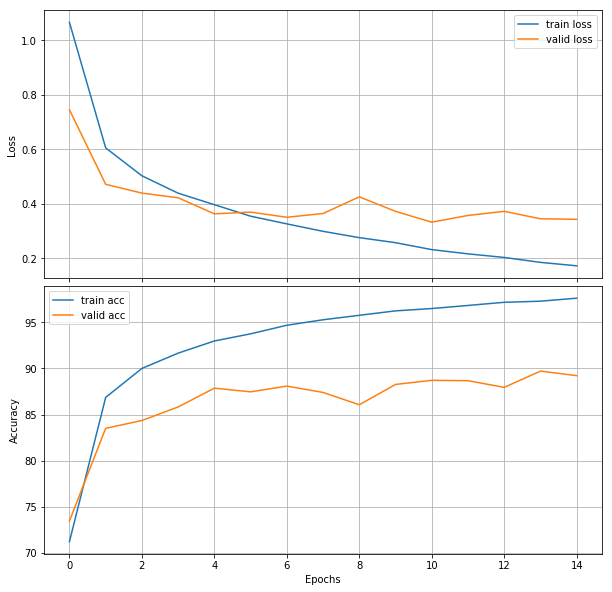

In [24]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
ax[0].plot(np.arange(N_EPOCHS),train_losses,label = "train loss")
ax[0].plot(np.arange(N_EPOCHS),valid_losses, label = "valid loss")
ax[1].plot(np.arange(N_EPOCHS),train_accs,label = "train acc")
ax[1].plot(np.arange(N_EPOCHS),valid_accs,label = "valid acc")

plt.subplots_adjust(hspace=0.03)
ax[1].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Accuracy")
ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)
plt.show()

### Conclusion

In this lab, not only did I gain a deeper understanding of the AlexNet model, how to implement pretrained models as well as how to alter the model architechture according to specific problems, I also learnt what docker is, and how to use it. The lab setting was the more challenging part of the lab. but i believed it will be very useful in the future. 
As for the next steps, I may try out various batch normalization mothods as well as different optimizers. 


## Try out AlexNet and Report on times

In [1]:
import torch
import urllib
import os
import timeit

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

#### 1. download pretrained model AlexNet and data

In [39]:
model = torch.hub.load('pytorch/vision:v0.5.0', 'alexnet', pretrained=True)
model2 = torch.hub.load('pytorch/vision:v0.5.0', 'alexnet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


In [40]:
model.eval()
model2.eval()

with urllib.request.urlopen("https://github.com/pytorch/hub/raw/master/images/dog.jpg") as url:
    filename = 'dog.jpg'
    with open(filename, 'wb') as f:
        f.write(url.read())

In [41]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
input_batch2 = input_tensor.unsqueeze(0)

In [42]:
print(input_tensor.shape)
print(input_batch.shape) # torch.Size([1, 3, 224, 224])

torch.Size([3, 224, 224])


#### 2. Check device availability

In [43]:
# Check availability of cuda
from chosen_gpu import get_freer_gpu
device = torch.device(get_freer_gpu()) if torch.cuda.is_available() else torch.device("cpu")
print("Configured device: ", device)

device2 = 'cpu'
print("Configured device2:",device2 )

Configured device:  cuda:3
Configured device2: cpu


In [44]:
# Set model and input to the chosen device
input_batch = input_batch.to(device)
input_batch2 = input_batch2.to(device2)
model.to(device)
model2.to(device2)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [45]:
print(input_batch.shape)

torch.Size([1, 3, 224, 224])


#### 3. Results

In [46]:
with torch.no_grad():
    starttime = timeit.default_timer()
    output = model(input_batch)
    timetaken = timeit.default_timer()-starttime
    
with torch.no_grad():
    starttime2 = timeit.default_timer()
    output2 = model2(input_batch2)
    timetaken2 = timeit.default_timer()-starttime2

In [47]:
print(output[0].shape)

torch.Size([1000])


In [52]:
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
output[0].shapesoftmax_scores = torch.nn.functional.softmax(output[0], dim=0)
output2[0].shapesoftmax_scores = torch.nn.functional.softmax(output[0], dim=0)

In [53]:
softmax_scores = torch.nn.functional.softmax(output[0], dim=0)
print(softmax_scores.shape)
softmax_scores2 = torch.nn.functional.softmax(output2[0], dim=0)
print(softmax_scores2.shape)

torch.Size([1000])
torch.Size([1000])


In [50]:
maxval, maxindex = output.max(1)
print('Maximum value', maxval, 'at index', maxindex)
print(f'max index: {maxindex} which is Samoyed')

Maximum value tensor([16.8252], device='cuda:3') at index tensor([258], device='cuda:3')
max index: tensor([258], device='cuda:3') which is Samoyed


In [54]:
maxval2, maxindex2 = output2.max(1)
print('Maximum value', maxval2, 'at index', maxindex2)
print(f'max index: {maxindex2} which is Samoyed')

Maximum value tensor([16.8252]) at index tensor([258])
max index: tensor([258]) which is Samoyed


#### 4. Report on time

In [51]:
print(f'device used: {device}')
print(f'timetaken: {timetaken}')
print(f'device used: {device2}')
print(f'timetaken: {timetaken2}')


device used: cuda:3
timetaken: 0.050001689000055194
device used: cpu
timetaken: 3.2608077559852973
